## Author: Fangjung(Kristy) Lin
## Purpose: Application of Naive Bayes in Telecom Industry (Case 4)

## Introduction and overview

- ### Using Naive Bayes to predict customer churn in telecom industry

    #### Goal: To know more about what make the customer churn and predicting if he/she will churn or not.

    Data set: The data was downloaded from IBM Sample Data Sets for customer retention programs.
    You can download it from here: https://www.kaggle.com/blastchar/telco-customer-churn/download

    The data set includes information about:

    - Customers who left within the last month – the column is called Churn
    - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    - Demographic info about customers – gender, age range, and if they have partners and dependents

## Content of the analysis

###  Import necessary packages
###  Part1. Data Acquisition and Data Cleaning
###  Part2. Exploratory Data Analysis
###  Part3. Naive Bayes
###  Part4. Conclusion

## Import necessary packages

In [1]:
install.packages("tidyverse")
library(tidyverse)
install.packages("recipes")
library(recipes)
library(readr)
library(tidyverse)
library(modelr)
library(ggplot2)
install.packages("GGally")
library(GGally)
install.packages("corrplot")
library(corrplot)
library(gridExtra) 
library(caret)
install.packages("e1071")
library("e1071")
install.packages("gplots")
install.packages("ROCR")
library(ROCR)
library(rpart)
install.packages('rpart.plot')
library(rpart.plot)
library(gplots)
install.packages('pROC')
library(pROC)
install.packages('naivebayes')
library(naivebayes)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘recipes’

The following object is masked from ‘package:stringr’:

    fixed

The following object is masked from ‘package:stats’:

    step

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded

Attaching package: ‘gridExtra’

The follo

## Part1. Data Acquisition and Data Cleaning

### Data Acquisition

Walk through telecom data set

In [2]:
tele_churn <- read_csv("Desktop/churn.csv")
head(tele_churn)

Parsed with column specification:
cols(
  .default = col_character(),
  SeniorCitizen = col_double(),
  tenure = col_double(),
  MonthlyCharges = col_double(),
  TotalCharges = col_double()
)
See spec(...) for full column specifications.


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


### Explore the strucuture of data

We can find that the data set contains 7043 observations and 21 variables

In [3]:
str(tele_churn)

tibble [7,043 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ customerID      : chr [1:7043] "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr [1:7043] "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : num [1:7043] 0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr [1:7043] "Yes" "No" "No" "No" ...
 $ Dependents      : chr [1:7043] "No" "No" "No" "No" ...
 $ tenure          : num [1:7043] 1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr [1:7043] "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr [1:7043] "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr [1:7043] "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr [1:7043] "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr [1:7043] "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr [1:7043] "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr [1:7043] "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr [1:7043] "No" "No" "No" "No" ...
 $ StreamingMovies : chr [1:7043] "No

### Overview of the data

Let's take an overview on some ascpects about the data.
We can find that most of the data is discrete, there is not a lot of missing values but we need to deal with them by removing or imputing and no columns missing completley.

In [4]:
# install.packages("DataExplorer")
# library(DataExplorer)
# plot_intro(tele_churn)

### Check the missing value
We are checking if this dataset has any missing values. 

In [5]:
unlist(lapply(tele_churn,function(x) sum(is.na(x))))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

I use lapply to check the number if missing values in each columns. We found that there are 11 missing values in “TotalCharges” columns. So, let’s remove all rows with missing values. 

### Missing value deletion

In this step, I deleted the rows which have missing values.

In [6]:
tele_churn <- na.omit(tele_churn)

## Part2. Exploratory Data Analysis

Let's see the overall summarize of our target variable

### Summary of the data frame 

In [7]:
summary(tele_churn)

  customerID           gender          SeniorCitizen      Partner         
 Length:7032        Length:7032        Min.   :0.0000   Length:7032       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1624                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7032        Min.   : 1.00   Length:7032        Length:7032       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.42                                        
                    3rd Qu.:55.00                                        
                    Max.   :72.

From the summarize above, I find that the min/max difference between tenure is quite huge. 
The difference between MonthlyCharges and TotalCharges are quite huge. I need to have a deeper analysis in these variables to see if they can influence the customer churn.

### Correlation among numeric variables

First, let's check the correlation between the numerical variables. 

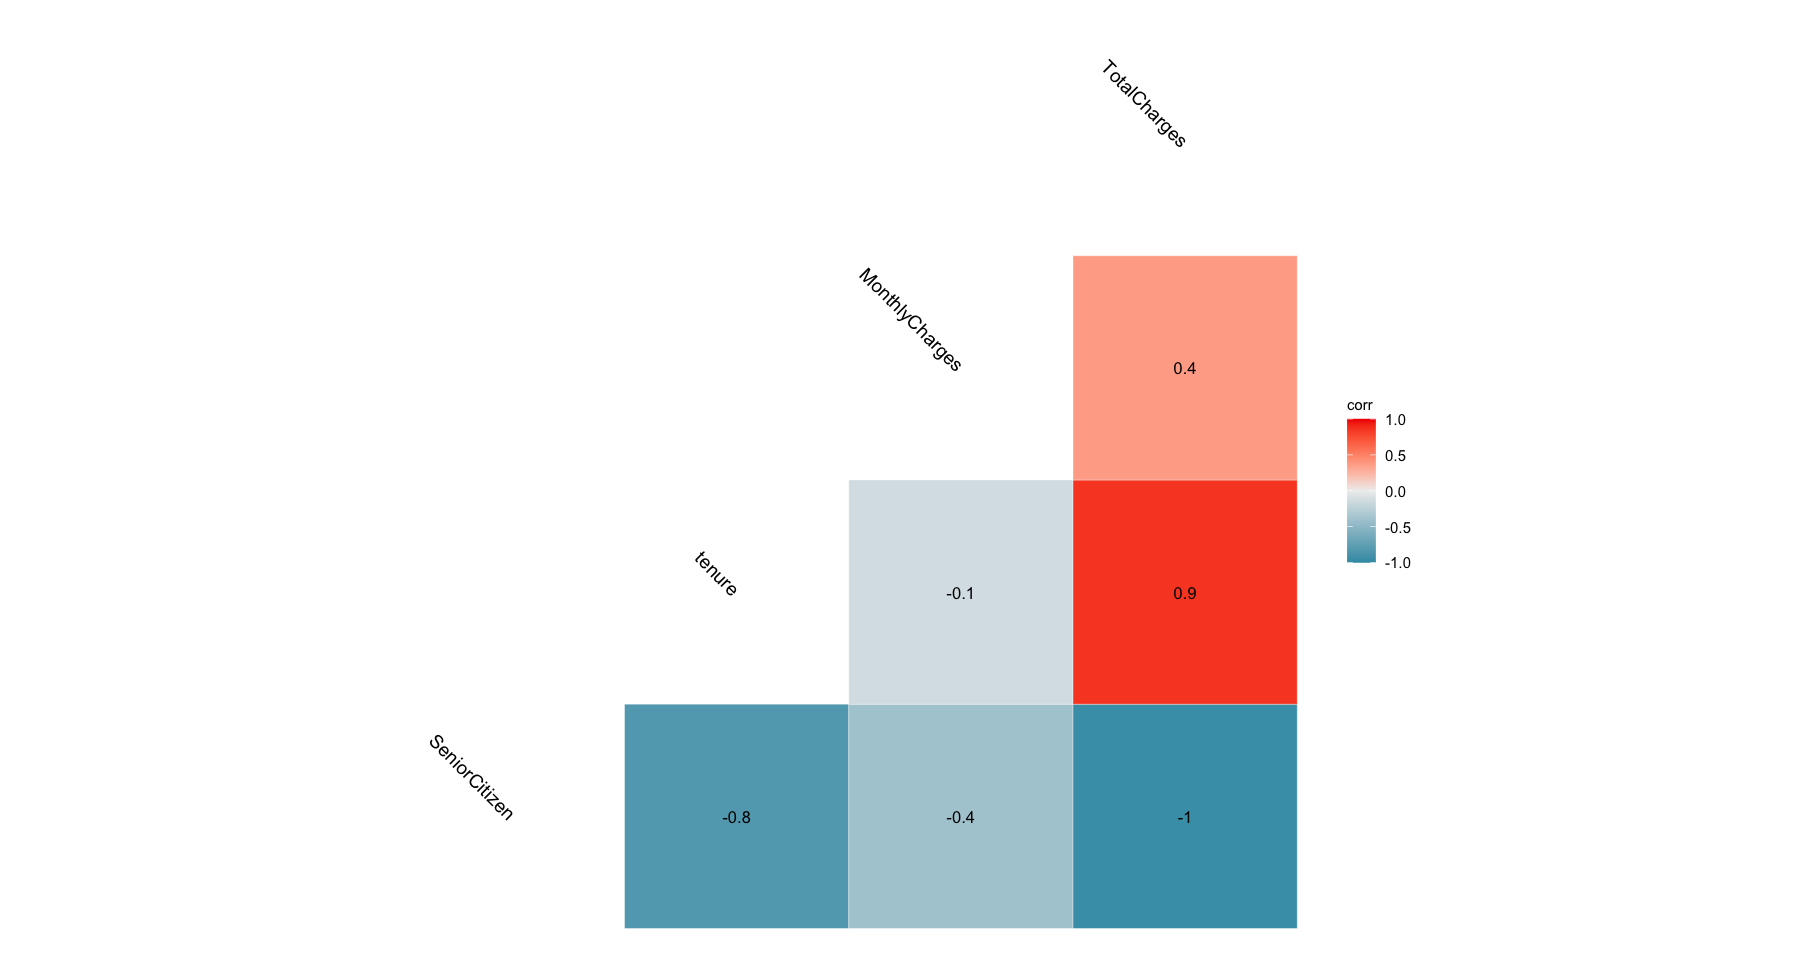

In [8]:
numeric.var <- sapply(tele_churn, is.numeric)
corr.matrix <- cor(tele_churn[,numeric.var])
options(repr.plot.width = 15, repr.plot.height = 8)
# corrplot(corr.matrix, main="\n\nCorrelation Plot for Numerical Variables", method = "number")

ggcorr(corr.matrix,name = "corr", label = TRUE, hjust = 1, label_size = 3.5, 
       angle = -45, size = 4)

From the correlation graph, it shows:

- SeniorCitizen has a strong negative relation with tenure, which is confused. 
- SeniorCitizen has a completely negative relation with TotalCharges. I assume that SeniorCitizen can be a factor that influence customer churn.
- tenure has a strong positive relation with totalcharges, which we need to take a deeper analysis to find if tenure has a positive relation with customer churn.

### Creating new column tenure_bin and converting the tenure in years

In [9]:
#senior citizen is in integer form
tele_churn$SeniorCitizen <- as.factor(tele_churn$SeniorCitizen)

tele_churn <- mutate(tele_churn,tenure_bin=tenure)
tele_churn$tenure_bin[tele_churn$tenure_bin >= 0 & tele_churn$tenure_bin <= 12]   <- "0 - 1 years"
tele_churn$tenure_bin[tele_churn$tenure_bin >= 13 & tele_churn$tenure_bin <= 24]  <- "1 - 2 years"
tele_churn$tenure_bin[tele_churn$tenure_bin >= 25 & tele_churn$tenure_bin <= 36]  <- "2 - 3 years"
tele_churn$tenure_bin[tele_churn$tenure_bin >= 37 & tele_churn$tenure_bin <= 48]  <- "3 - 4 years"
tele_churn$tenure_bin[tele_churn$tenure_bin >= 49 & tele_churn$tenure_bin <= 60]  <- "4 - 5 years"
tele_churn$tenure_bin[tele_churn$tenure_bin >= 61 & tele_churn$tenure_bin <= 72]  <- "5 - 6 years"

#converting the newly created column into factor tenure_bin.
tele_churn$tenure_bin = as.factor(tele_churn$tenure_bin)

### In the column MultipleLines modifying the No phone service -> No

In [10]:
tele_churn$MultipleLines[which(tele_churn$MultipleLines=="No phone service")]<-"No"

### Graphical Representation of the Numerical Variables histograms

Warning message:
“position_stack requires non-overlapping x intervals”

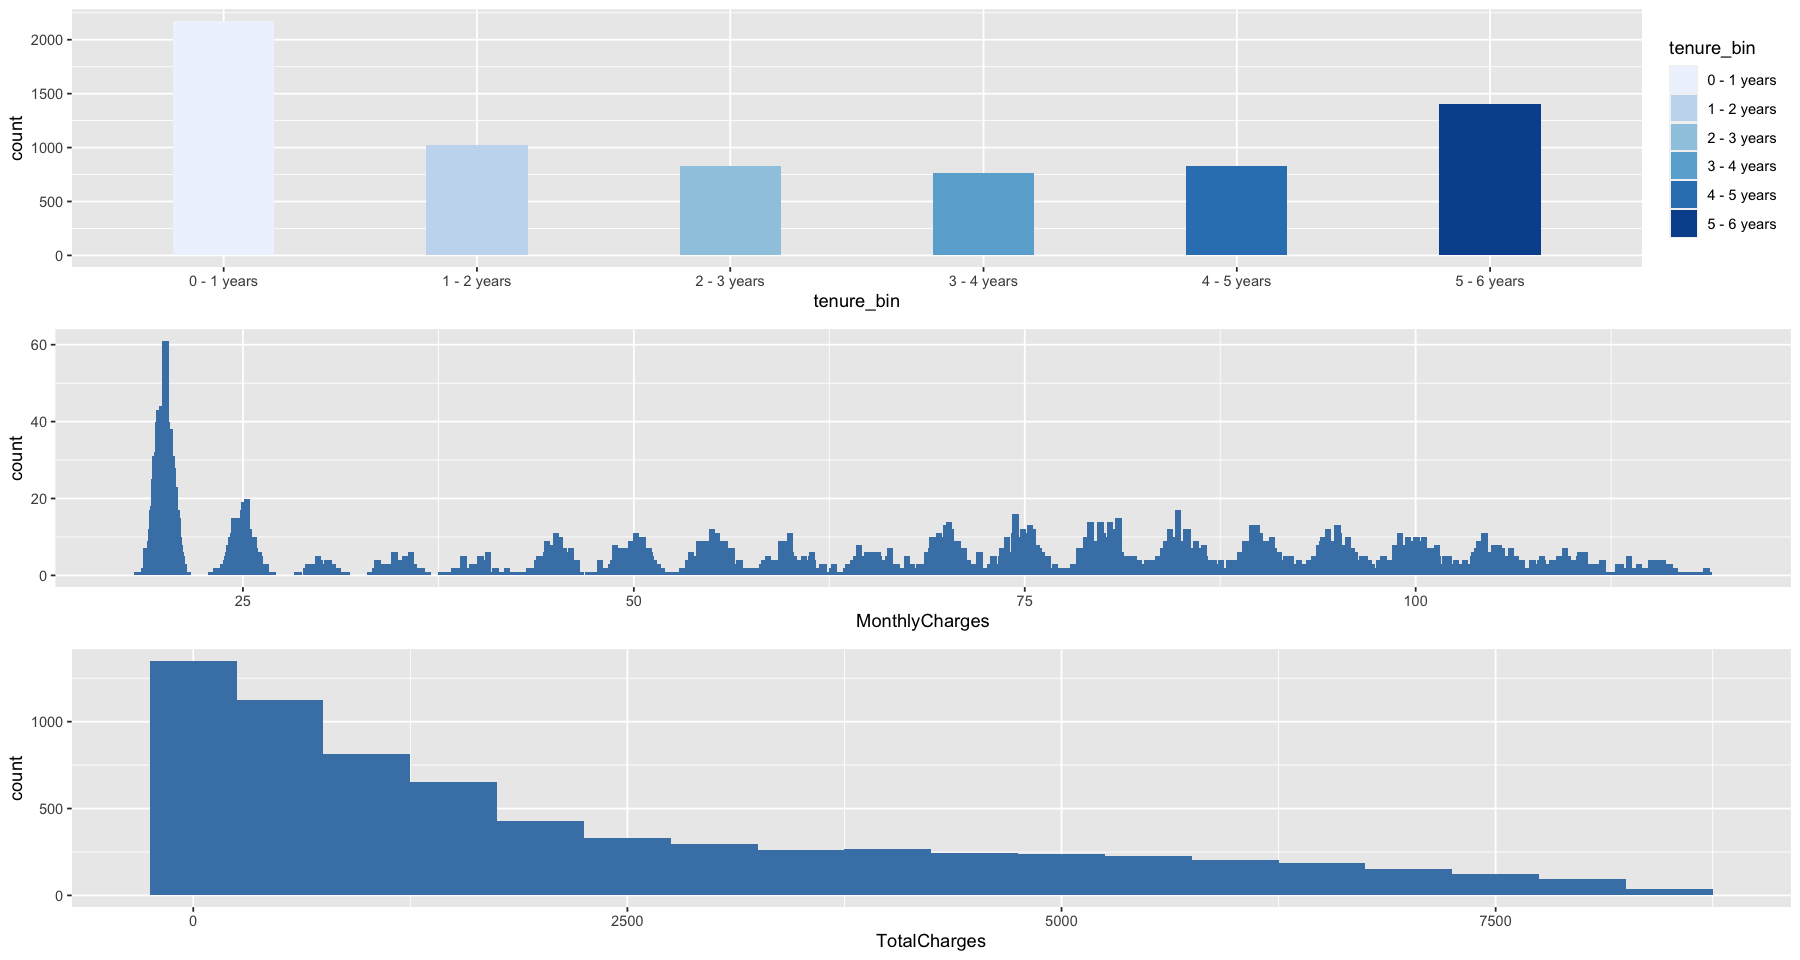

In [11]:
plot_A <- ggplot(tele_churn,aes(x = tenure_bin,fill=tenure_bin))+ geom_bar(width=0.4)+
                 scale_fill_brewer(palette="Blues")
plot_B <- ggplot(tele_churn,aes(x = MonthlyCharges))+ geom_bar(fill="steelblue",width=0.4)
plot_C <- ggplot(tele_churn,aes(x = TotalCharges))+ geom_histogram(fill="steelblue",binwidth =500)

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(plot_A,plot_B,plot_C)

From the tenure bin, we can find:

- Most people tenure year is between 0-1 years
- The trend of monthly charges and total charges is the similiar.

### Visualize the distribution of each variable

In [12]:
plot4 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = PaymentMethod,y=..prop..,group=2)
                                            ,fill="Steelblue",stat='count',width=0.4)
plot5 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = gender,y=..prop..,group=2)
                                            ,fill="Steelblue",stat='count',width=0.4)
plot6 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = SeniorCitizen,y=..prop..,group=2)
                                            ,fill="Steelblue",stat='count',width=0.4)
plot7 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = Partner,y=..prop..,group=2)
                                            ,fill="Steelblue",width=0.4,stat='count')
plot8 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = Dependents,y=..prop..,group=2)
                                            ,fill="Steelblue",width=0.4,stat='count')
plot9 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = PhoneService,y=..prop..,group=2),
                                            fill="Steelblue",width=0.4,stat='count')
plot10 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = MultipleLines,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot11 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = InternetService,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot12 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = OnlineSecurity,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot13 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = OnlineBackup,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot14 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = DeviceProtection,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot15 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = TechSupport,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot16 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = StreamingTV,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot17 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = StreamingMovies,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot18 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = Contract,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot19 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = PaperlessBilling,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')
plot20 <- ggplot(data=tele_churn) + geom_bar(mapping = aes(x = Churn,y=..prop..,group=2),
                                             fill="Steelblue",width=0.4,stat='count')

### Gender/PaperlessBilling/Churn

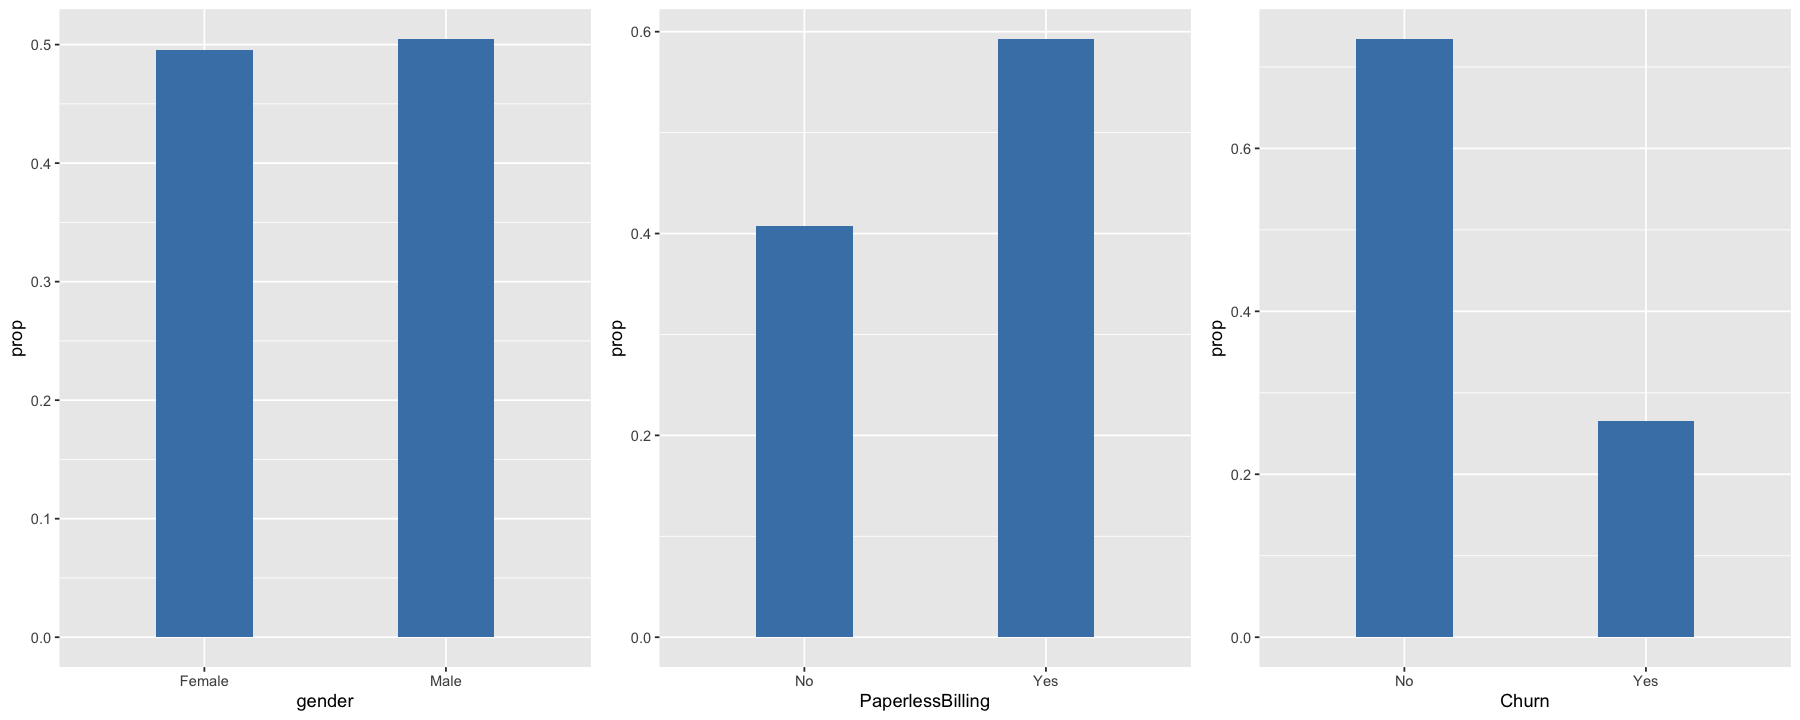

In [13]:
options(repr.plot.width = 15, repr.plot.height = 6)
grid.arrange(plot5,plot19,plot20,ncol=3)

- The data includes almost equal proportion of males and females.
- Almost 58% customers are on paperless billing.
- 26% of the customers have churned from the platform. From the distribution of customer churn, we can find that it's an inbalance data set.

### InternetService/ OnlineSecurity/ OnlineBackup/ StreamingTV/ DeviceProtection/ TechSupport

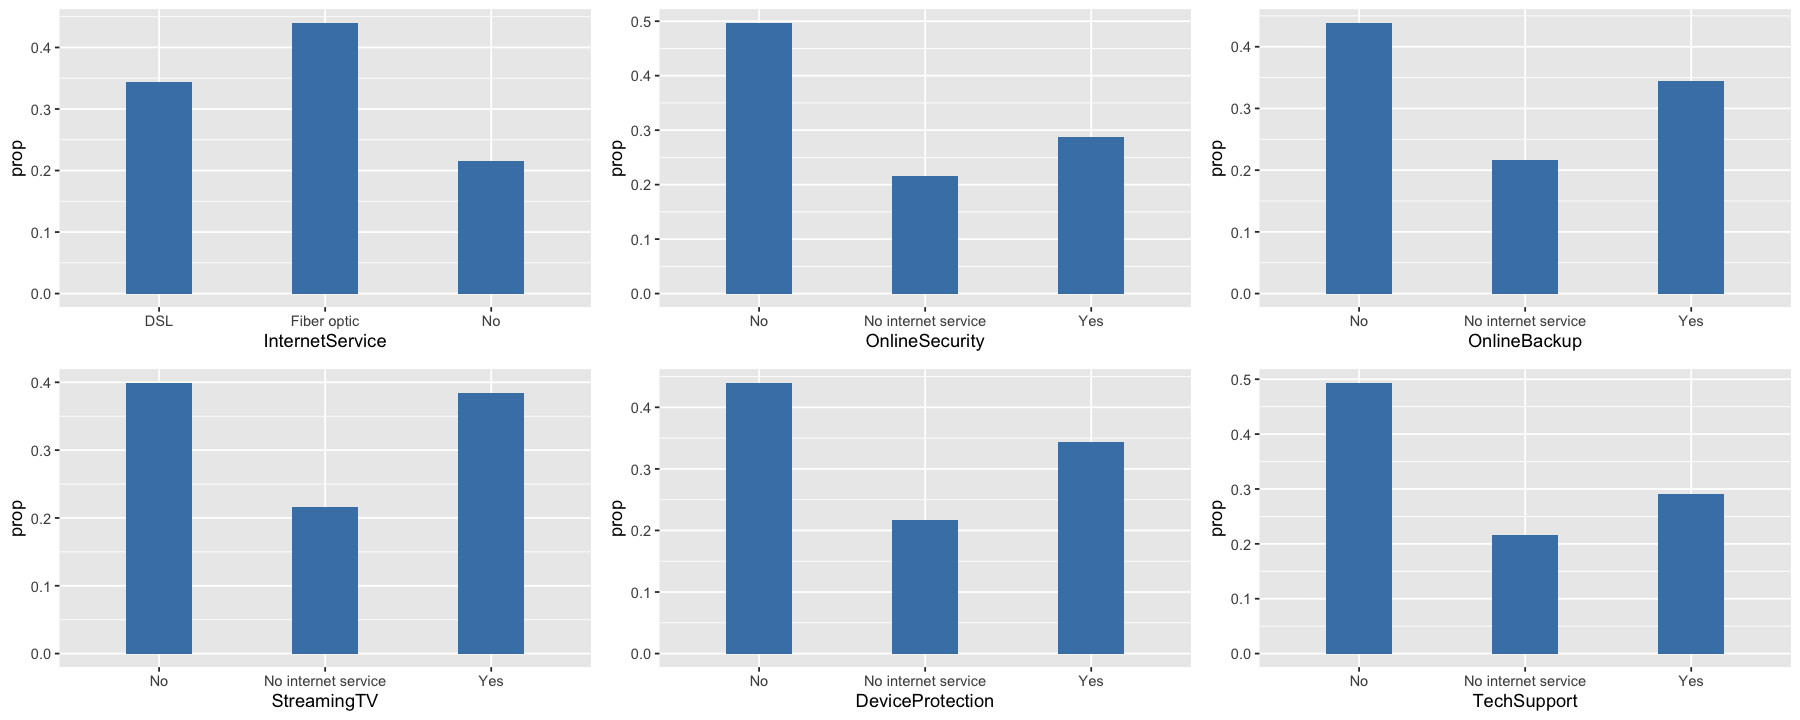

In [14]:
grid.arrange(plot11,plot12,plot13,plot16,plot14,plot15,nrow=2, ncol=3)

- Almost 40% of the customers have subscribed for the Fibre optic internet service.
- Almost 50% of the customers have no online security and almost 45% customers have no online backup.
- Almost 50% customers have no techsupport access and 40% have no streamingtv as a service.
- 45% of the customers have no service of device protection.

### PaymentMethod/ SeniorCitizen/ Partner/ Dependents/ PhoneService/ MultipleLines

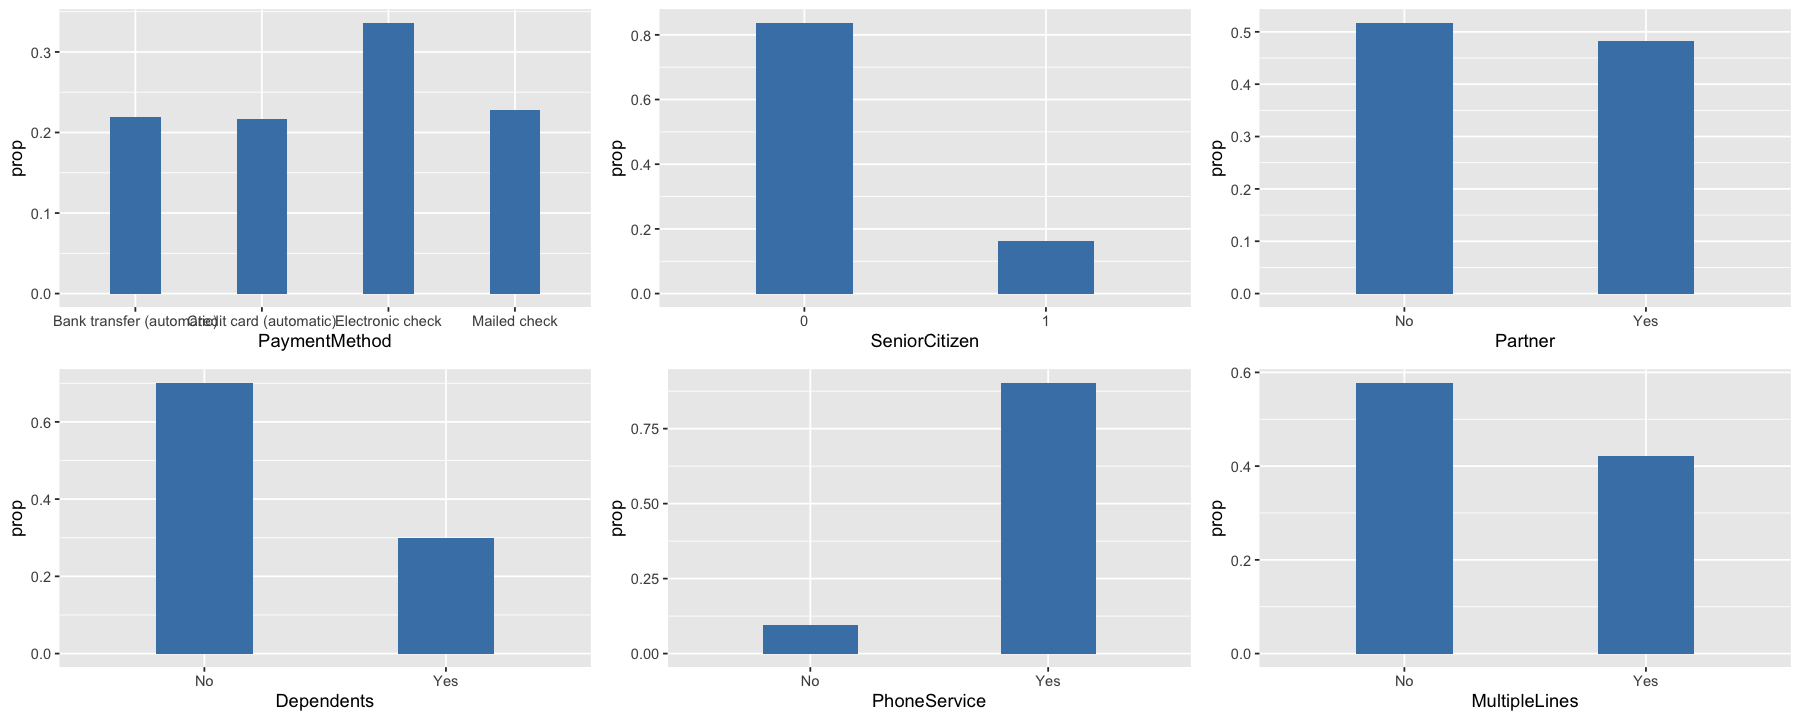

In [15]:
grid.arrange(plot4,plot6,plot7,plot8,plot9,plot10,nrow=2,ncol=3)

- Maximum number of customers have subscribered for electronic check for their payments.
- Very less i.e approx 20% of the customers are senior citizens.
- Equal number of customers with and without partners.
- 65% of the customers have no dependents.
-  Almost 87% of the customers are with the phoneservice.

### Summaries of  Variables 

In [16]:
#Gender
cat("Gender")
type_counts1 <- table(tele_churn$gender)
type_counts1 / sum(type_counts1) * 100

#SeniorCitizen
cat("SeniorCitizen")
type_counts2 <- table(tele_churn$SeniorCitizen)
type_counts2 / sum(type_counts2) * 100

#Partner
cat("Partner")
type_counts3 <- table(tele_churn$Partner)
type_counts3 / sum(type_counts3) * 100

#Dependents
cat("SeniorCitizen")
type_counts4 <- table(tele_churn$Dependents)
type_counts4 / sum(type_counts4) * 100
             
#PhoneService
cat("Dependents")
type_counts5 <- table(tele_churn$PhoneService)
type_counts5 / sum(type_counts5) * 100

Gender


  Female     Male 
49.53072 50.46928 

SeniorCitizen


       0        1 
83.75995 16.24005 

Partner


      No      Yes 
51.74915 48.25085 

SeniorCitizen


      No      Yes 
70.15074 29.84926 

Dependents


      No      Yes 
 9.67008 90.32992 

In [17]:
#MultipleLines
cat("MultipleLines")
type_counts6 <- table(tele_churn$MultipleLines)
type_counts6 / sum(type_counts6) * 100

#InternetService
cat("InternetService")
type_counts7 <- table(tele_churn$InternetService)
type_counts7 / sum(type_counts7) * 100

#OnlineSecurity
cat("OnlineSecurity")
type_counts8 <- table(tele_churn$OnlineSecurity)
type_counts8 / sum(type_counts8) * 100
              
#OnlineBackup
cat("OnlineBackup")
type_counts9 <- table(tele_churn$OnlineBackup)
type_counts9 / sum(type_counts9) * 100

#DeviceProtection
cat("DeviceProtection")
type_counts10 <- table(tele_churn$DeviceProtection)
type_counts10 / sum(type_counts10) * 100

#TechSupport
cat("TechSupport")
type_counts11 <- table(tele_churn$TechSupport)
type_counts11 / sum(type_counts11) * 100

MultipleLines


      No      Yes 
57.80717 42.19283 

InternetService


        DSL Fiber optic          No 
   34.35722    44.02730    21.61547 

OnlineSecurity


                 No No internet service                 Yes 
           49.72981            21.61547            28.65472 

OnlineBackup


                 No No internet service                 Yes 
           43.89932            21.61547            34.48521 

DeviceProtection


                 No No internet service                 Yes 
           43.99886            21.61547            34.38567 

TechSupport


                 No No internet service                 Yes 
           49.37429            21.61547            29.01024 

In [18]:
#StreamingTV
cat("StreamingTV")
type_counts12 <- table(tele_churn$StreamingTV)
type_counts12 / sum(type_counts12) * 100

#STreaming Movies
cat("STreaming Movies")
type_counts13 <- table(tele_churn$StreamingMovies)
type_counts13 / sum(type_counts13) * 100

#Contract
cat("Contract")
type_counts14 <- table(tele_churn$Contract)
type_counts14 / sum(type_counts14) * 100

#PaperlessBilling
cat("PaperlessBilling")
type_counts15 <- table(tele_churn$PaperlessBilling)
type_counts15 / sum(type_counts15) * 100

#PaymentMethod
cat("PaymentMethod")
type_counts16 <- table(tele_churn$PaymentMethod)
type_counts16 / sum(type_counts16) * 100

#Churn
cat("Churn")
type_counts17 <- table(tele_churn$Churn)
type_counts17 / sum(type_counts17) * 100

StreamingTV


                 No No internet service                 Yes 
           39.94596            21.61547            38.43857 

STreaming Movies


                 No No internet service                 Yes 
           39.54778            21.61547            38.83675 

Contract


Month-to-month       One year       Two year 
      55.10523       20.93288       23.96189 

PaperlessBilling


     No     Yes 
40.7281 59.2719 

PaymentMethod


Bank transfer (automatic)   Credit card (automatic)          Electronic check 
                 21.92833                  21.62969                  33.63197 
             Mailed check 
                 22.81001 

Churn


     No     Yes 
73.4215 26.5785 

### Dependent variable Churn vs Tenure_bin

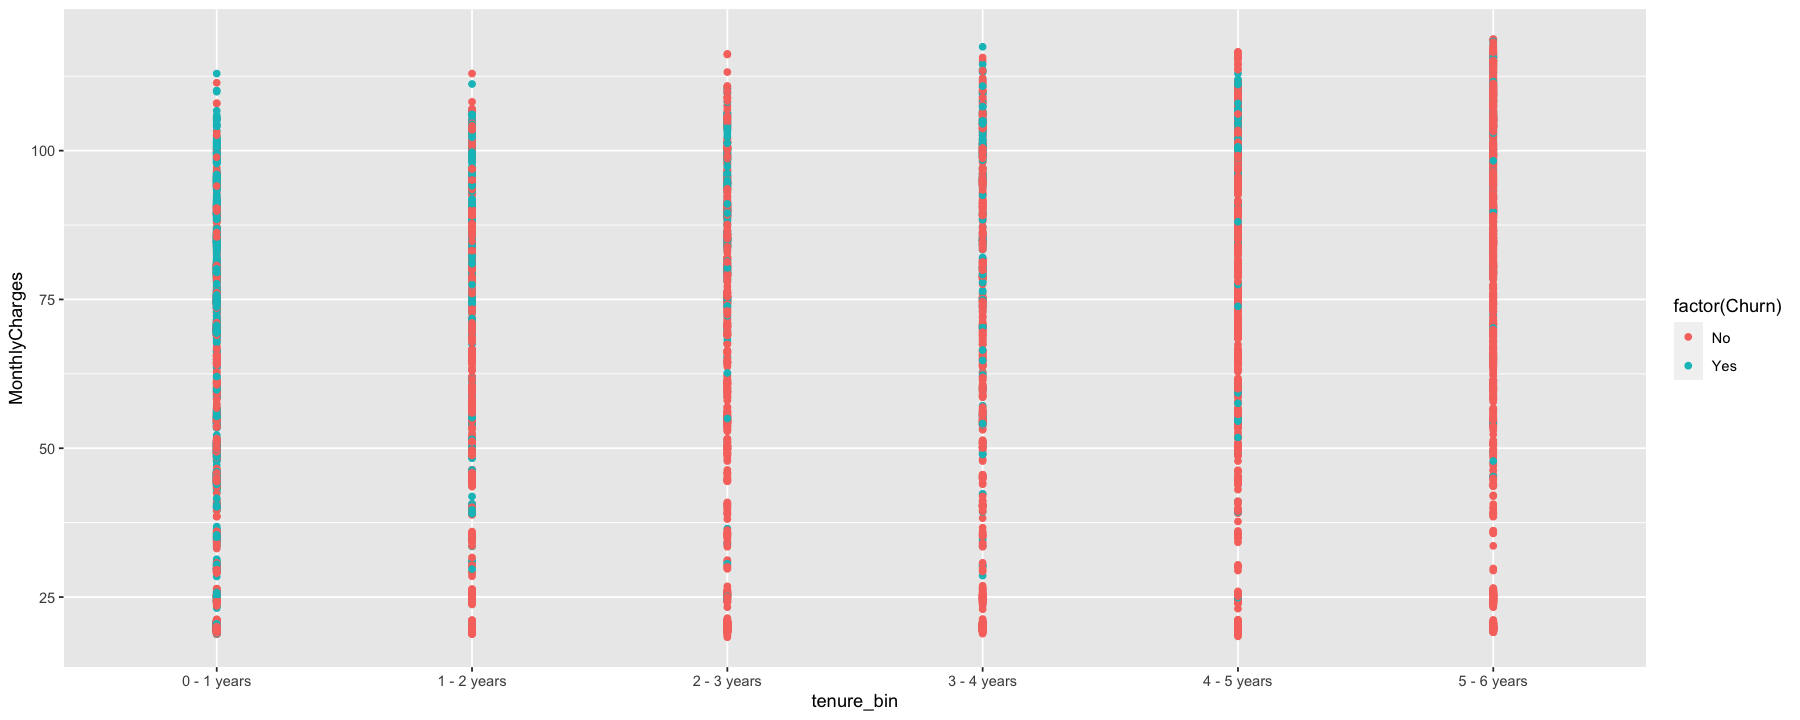

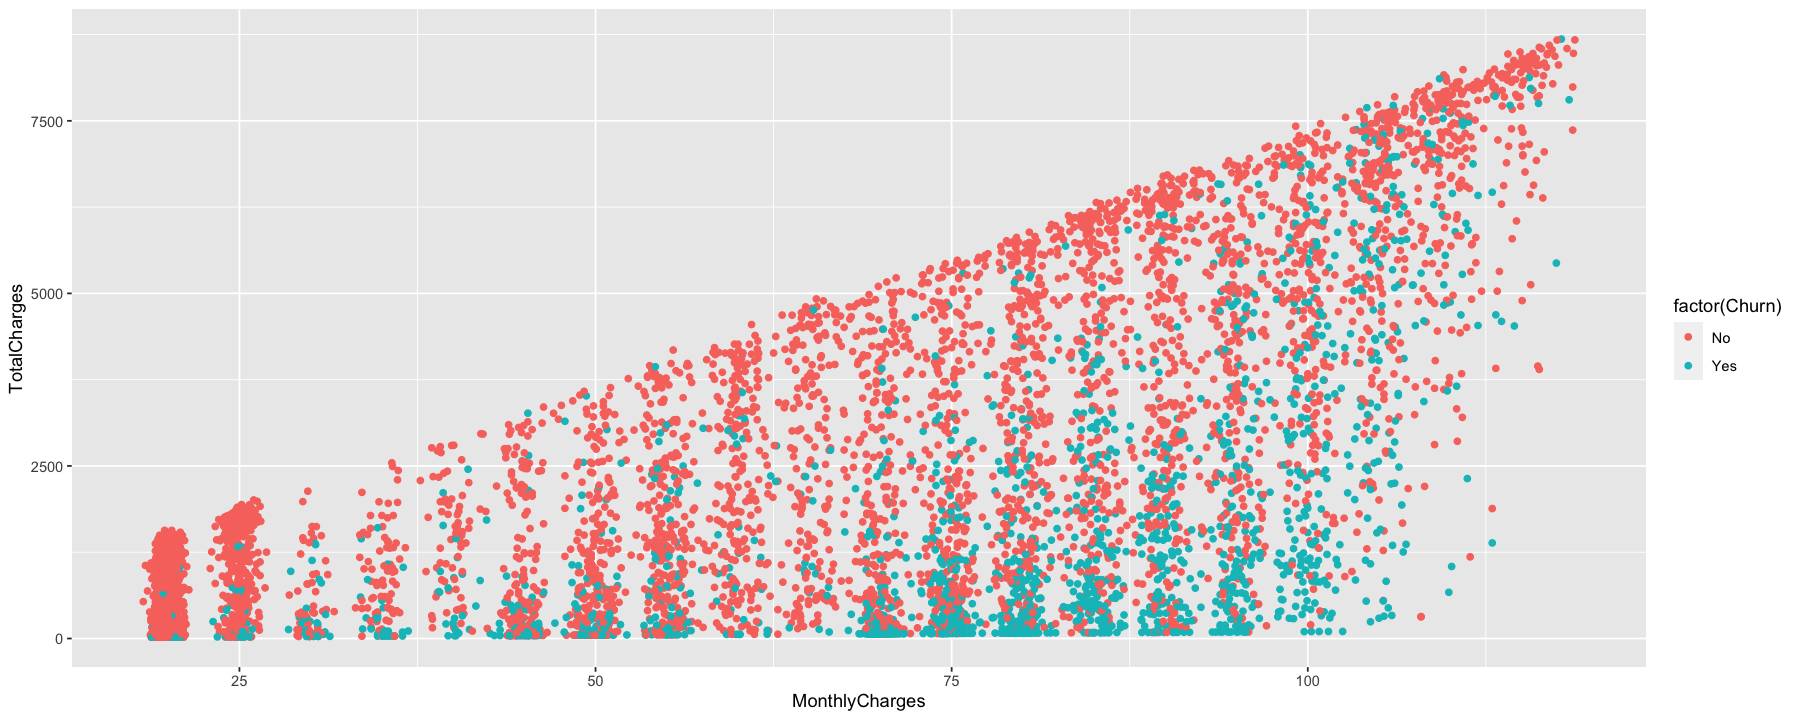

In [19]:
options(repr.plot.width = 15, repr.plot.height = 6)
ggplot(tele_churn, aes(x = tenure_bin , y = MonthlyCharges)) + geom_point(aes(colour=factor(Churn)))
ggplot(tele_churn, aes(x = MonthlyCharges , y = TotalCharges)) + geom_point(aes(colour=factor(Churn))) 

- Maximum Customers churned from the platform are the one having a tenure of 0-1 years.
- Maximum Churned customers have a Monthly charge more than $65.

### Relationship between the variables (dependent variable Churn vs Categorical Variables) 

In [20]:
#gender vs churn
plot_relation_1 =ggplot(tele_churn, aes(x = gender,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#SeniorCitizen vs Churn
plot_relation_2 =ggplot(tele_churn, aes(x = SeniorCitizen,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#partner vs Churn
plot_relation_3 =ggplot(tele_churn, aes(x = Partner,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#Dependents vs Churn
plot_relation_4 =ggplot(tele_churn, aes(x = Dependents,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#phoneservices vs Churn
plot_relation_5 =ggplot(tele_churn, aes(x = PhoneService,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#MultipleLines vs Churn
plot_relation_6 =ggplot(tele_churn, aes(x = MultipleLines,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#InternetServices vs Churn
plot_relation_7 =ggplot(tele_churn, aes(x = InternetService,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#OnlineSecurity vs Churn
plot_relation_8 =ggplot(tele_churn, aes(x = OnlineSecurity,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#Onlinebackup vs Churn
plot_relation_9 =ggplot(tele_churn, aes(x = OnlineBackup,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#DeviceProtection vs Churn
plot_relation_10 =ggplot(tele_churn, aes(x = DeviceProtection,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#TechSupport vs Churn
plot_relation_11 =ggplot(tele_churn, aes(x = TechSupport,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#StreamingTV vs Churn
plot_relation_12 =ggplot(tele_churn, aes(x = StreamingTV,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#StreamingMovies vs Churn
plot_relation_13 =ggplot(tele_churn, aes(x = StreamingMovies,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#Contract vs Churn
plot_relation_14 =ggplot(tele_churn, aes(x = Contract,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#PaperlessBilling vs Churn
plot_relation_15 =ggplot(tele_churn, aes(x = PaperlessBilling,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")
#PaymentMethod vs Churn
plot_relation_16 =ggplot(tele_churn, aes(x = PaymentMethod,fill=Churn)) + geom_bar(width = 0.4)+scale_fill_brewer(palette="Blues")

### Visualize the result

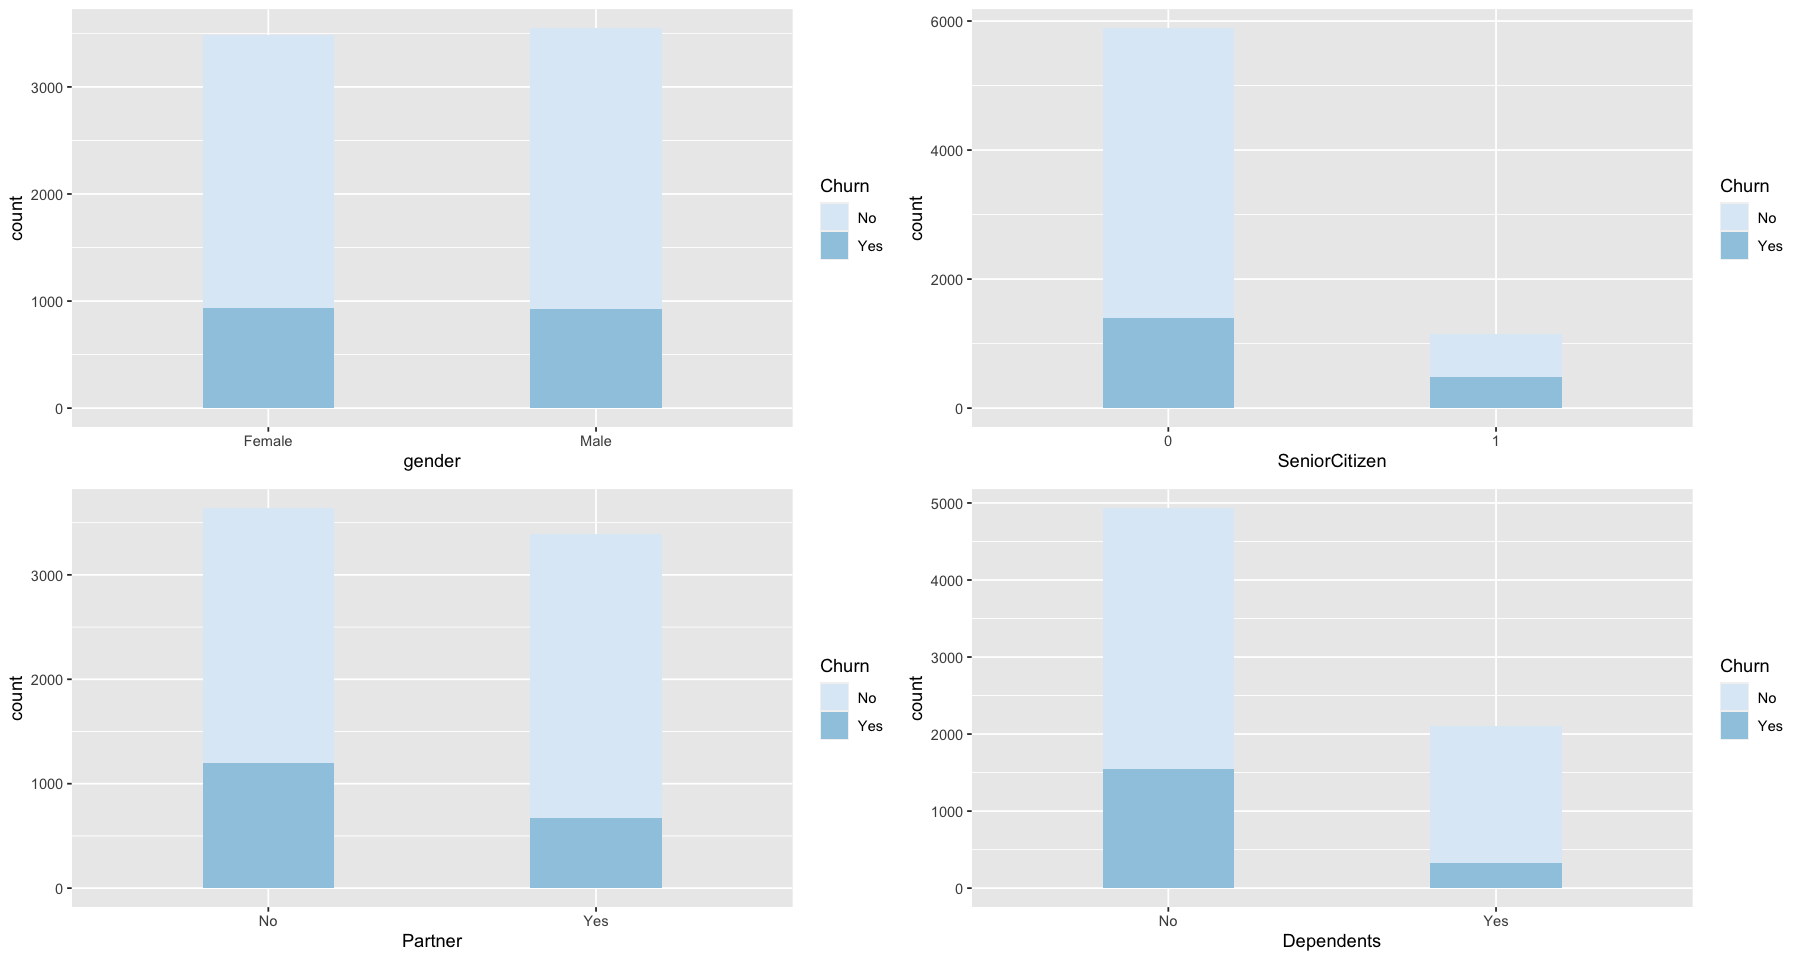

In [21]:
options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(plot_relation_1,plot_relation_2,plot_relation_3,plot_relation_4)

- We can see clearly that there is no specific gender correlated with Churned or not churned both genders have the same distribution for both 0 and 1
- The fraction of churned out of all SeniorCitizen is much bigger that the fraction of churned out of all non SeniorCitizen so being SeniorCitizen is indeed an important factor of churning
- Half the people have Partner and they have less probability of Churning than people who don't have as we can see the fraction of churned in Partner group is less than no Partner group
- Churn rate is more among the customers with no dependents. The ratio of churned people who don't have Dependents is 31% wehre in the people who have dependent is 15% only which is half the ratio which means that not having dependent increase the probability of churn

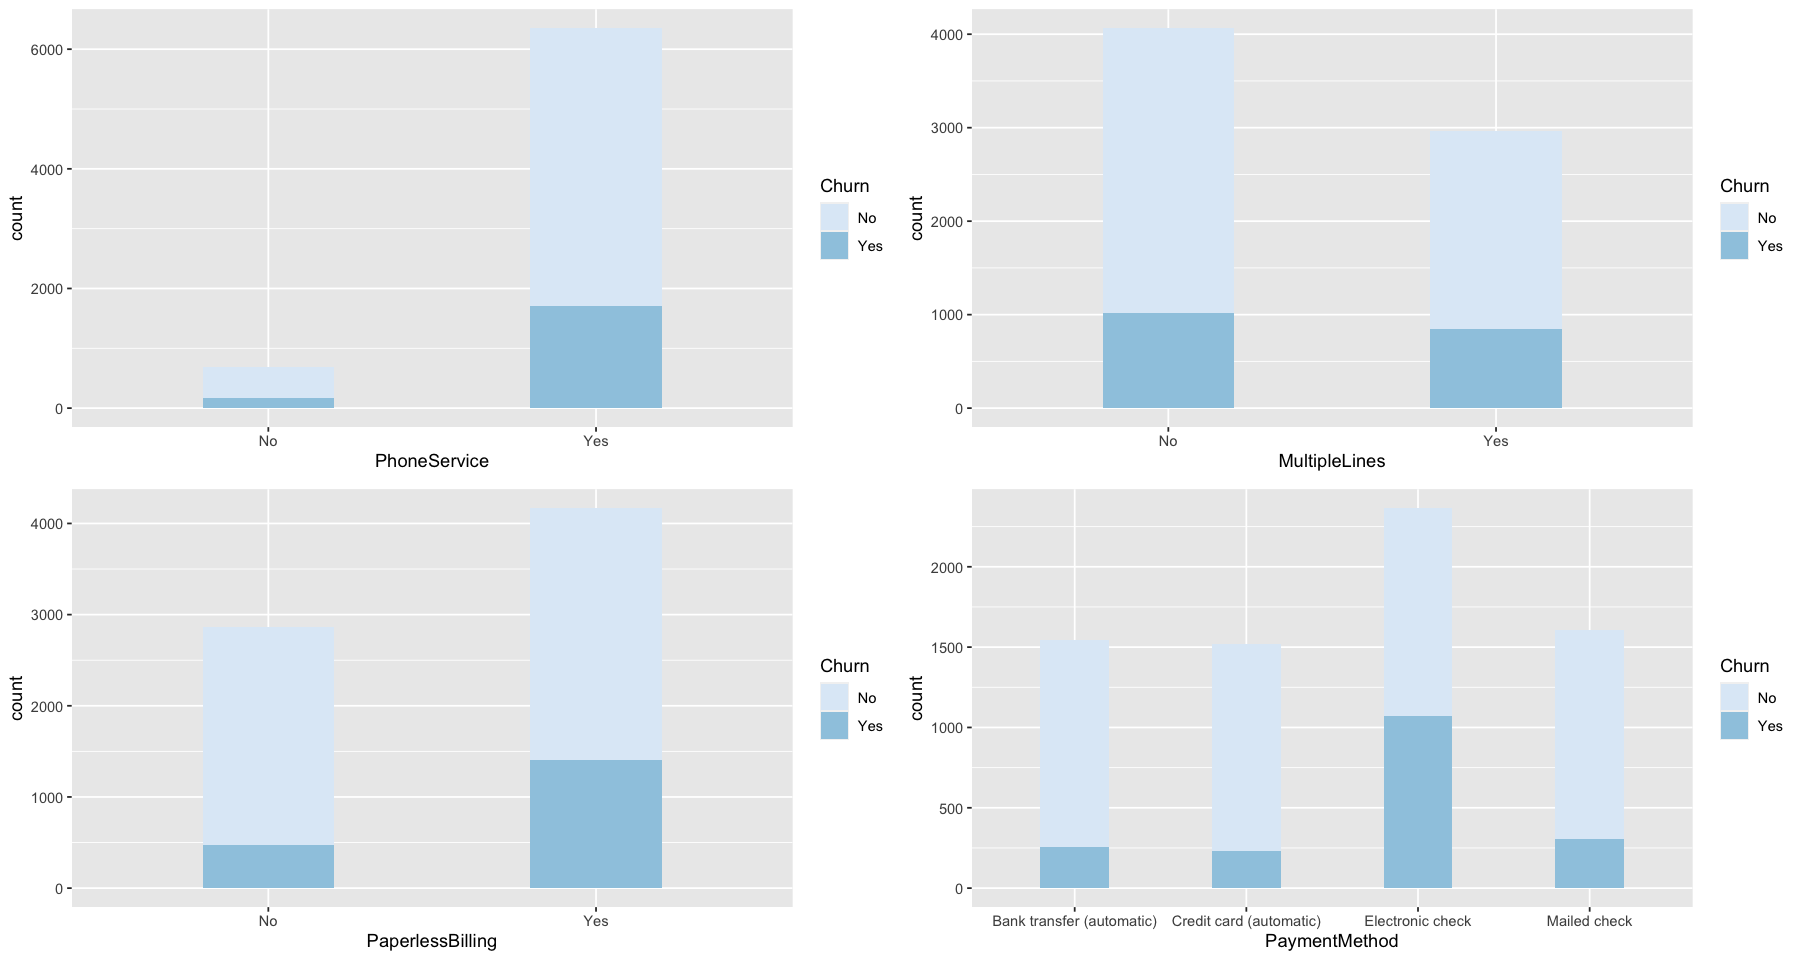

In [22]:
options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(plot_relation_5,plot_relation_6,plot_relation_15,plot_relation_16)

- Churn rate is more with customers having phone service.
- Churn rate is more with customers having paperless billing.
- Churn rate is more with customers having electronic check as the payment mode.

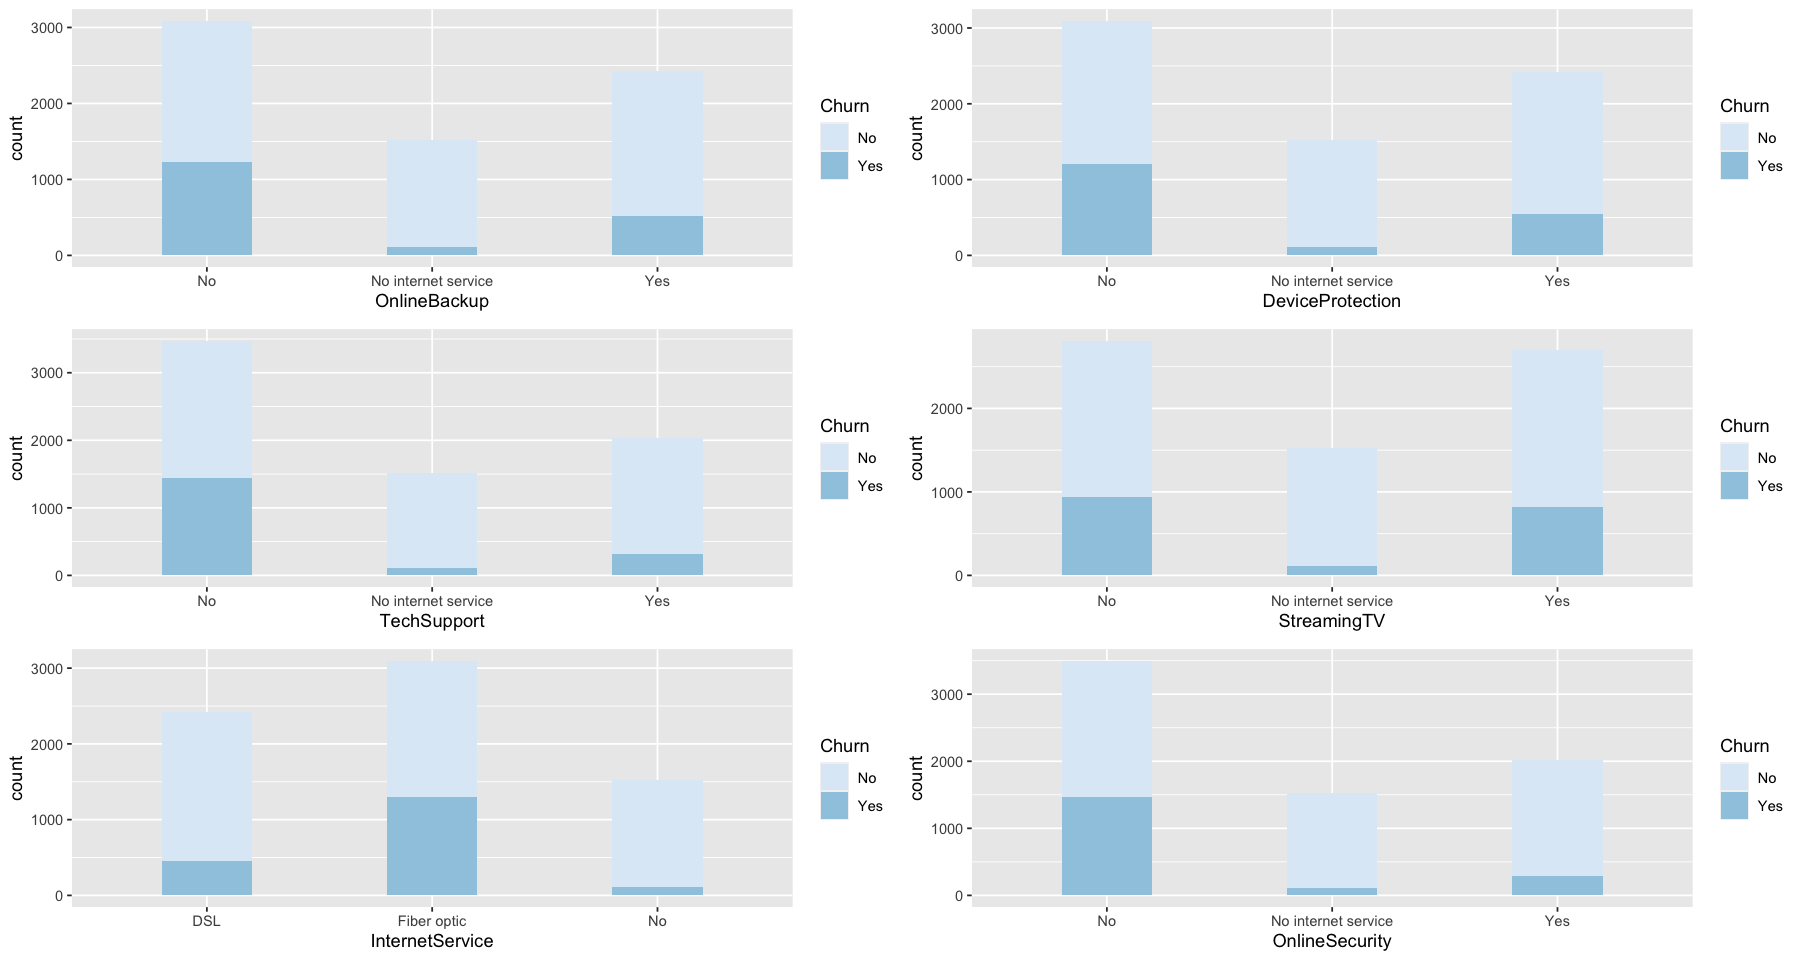

In [23]:
options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(plot_relation_9,plot_relation_10,plot_relation_11,plot_relation_12,plot_relation_7,plot_relation_8)

- Churn rate is more with customers having month to month contract.
- Churn rate is more with customers having no online security and techsupport.
- Churn rate is almost equal among the subscribers with or without the streamingtv.

## Part3. Naive Bayes

### Data frame manipulation

In [24]:
tele_churn$churn_number <- 0
tele_churn$churn_number[tele_churn$Churn == 'Yes'] <- 1
tele_churn$Churn <- NULL

### Convert categorical variables to factor

In [25]:
tele_churn$gender <- as.factor(tele_churn$gender)
tele_churn$SeniorCitizen <- as.factor(tele_churn$SeniorCitizen)
tele_churn$Partner <- as.factor(tele_churn$Partner)
tele_churn$Dependents <- as.factor(tele_churn$Dependents)
tele_churn$PhoneService <- as.factor(tele_churn$PhoneService)
tele_churn$MultipleLines <- as.factor(tele_churn$MultipleLines)
tele_churn$InternetService <- as.factor(tele_churn$InternetService)
tele_churn$OnlineSecurity <- as.factor(tele_churn$OnlineSecurity)
tele_churn$OnlineBackup <- as.factor(tele_churn$OnlineBackup)
tele_churn$DeviceProtection <- as.factor(tele_churn$DeviceProtection)
tele_churn$TechSupport <- as.factor(tele_churn$TechSupport)
tele_churn$StreamingTV <- as.factor(tele_churn$StreamingTV)
tele_churn$StreamingMovies <- as.factor(tele_churn$StreamingMovies)
tele_churn$Contract <- as.factor(tele_churn$Contract)
tele_churn$PaperlessBilling <- as.factor(tele_churn$PaperlessBilling)
tele_churn$PaymentMethod <- as.factor(tele_churn$PaymentMethod)

### Remove unnecessary columns for modeling

We don't need the customerID and tenure (tenure from the dataset has already transformed the tenure values in tenure_bin).

In [26]:
tele_churn$customerID <- NULL
tele_churn$tenure <- NULL

### Creating dummy variables 

In [27]:
trainDummy <- dummyVars('~.', data = tele_churn, fullRank = F)

In [28]:
train <- as.data.frame(predict(trainDummy, tele_churn))
colnames(train)

[1] "gender.Female"                          
 [2] "gender.Male"                            
 [3] "SeniorCitizen.0"                        
 [4] "SeniorCitizen.1"                        
 [5] "Partner.No"                             
 [6] "Partner.Yes"                            
 [7] "Dependents.No"                          
 [8] "Dependents.Yes"                         
 [9] "PhoneService.No"                        
[10] "PhoneService.Yes"                       
[11] "MultipleLines.No"                       
[12] "MultipleLines.Yes"                      
[13] "InternetService.DSL"                    
[14] "InternetService.Fiber optic"            
[15] "InternetService.No"                     
[16] "OnlineSecurity.No"                      
[17] "OnlineSecurity.No internet service"     
[18] "OnlineSecurity.Yes"                     
[19] "OnlineBackup.No"                        
[20] "OnlineBackup.No internet service"       
[21] "OnlineBackup.Yes"                       
[22] "DeviceProtection.No"                    
[23] "DeviceProtection.No internet service"   
[24] "DeviceProtection.Yes"                   
[25] "TechSupport.No"                         
[26] "TechSupport.No internet service"        
[27] "TechSupport.Yes"                        
[28] "StreamingTV.No"                         
[29] "StreamingTV.No internet service"        
[30] "StreamingTV.Yes"                        
[31] "StreamingMovies.No"                     
[32] "StreamingMovies.No internet service"    
[33] "StreamingMovies.Yes"                    
[34] "Contract.Month-to-month"                
[35] "Contract.One year"                      
[36] "Contract.Two year"                      
[37] "PaperlessBilling.No"                    
[38] "PaperlessBilling.Yes"                   
[39] "PaymentMethod.Bank transfer (automatic)"
[40] "PaymentMethod.Credit card (automatic)"  
[41] "PaymentMethod.Electronic check"         
[42] "PaymentMethod.Mailed check"             
[43] "MonthlyCharges"                         
[44] "TotalCharges"                           
[45] "tenure_bin.0 - 1 years"                 
[46] "tenure_bin.1 - 2 years"                 
[47] "tenure_bin.2 - 3 years"                 
[48] "tenure_bin.3 - 4 years"                 
[49] "tenure_bin.4 - 5 years"                 
[50] "tenure_bin.5 - 6 years"                 
[51] "churn_number"

In [29]:
train$churn_number <- as.factor(ifelse(train$churn_number == 1, 'yes', 'no'))

### Make sure the structure of data

In [30]:
str(tele_churn)

tibble [7,032 × 20] (S3: tbl_df/tbl/data.frame)
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No internet service",..: 1 1 1 3 1 1 1 1 3 1 ...
 $ StreamingTV     : Facto

### Splitting Training and Test Data

Data splliting into test and train into 70/30 ratio.

In [31]:
set.seed(123)
split <- sample(2,nrow(train),replace = T,prob = c(0.7,0.3))
traindf <- train[split == 1,]
testdf <- train[split == 2,]

dim(traindf)
dim(testdf)

[1] 4943   51

[1] 2089   51

In [32]:
colnames(traindf)
colnames(testdf)

[1] "gender.Female"                          
 [2] "gender.Male"                            
 [3] "SeniorCitizen.0"                        
 [4] "SeniorCitizen.1"                        
 [5] "Partner.No"                             
 [6] "Partner.Yes"                            
 [7] "Dependents.No"                          
 [8] "Dependents.Yes"                         
 [9] "PhoneService.No"                        
[10] "PhoneService.Yes"                       
[11] "MultipleLines.No"                       
[12] "MultipleLines.Yes"                      
[13] "InternetService.DSL"                    
[14] "InternetService.Fiber optic"            
[15] "InternetService.No"                     
[16] "OnlineSecurity.No"                      
[17] "OnlineSecurity.No internet service"     
[18] "OnlineSecurity.Yes"                     
[19] "OnlineBackup.No"                        
[20] "OnlineBackup.No internet service"       
[21] "OnlineBackup.Yes"                       
[22] "DeviceProtection.No"                    
[23] "DeviceProtection.No internet service"   
[24] "DeviceProtection.Yes"                   
[25] "TechSupport.No"                         
[26] "TechSupport.No internet service"        
[27] "TechSupport.Yes"                        
[28] "StreamingTV.No"                         
[29] "StreamingTV.No internet service"        
[30] "StreamingTV.Yes"                        
[31] "StreamingMovies.No"                     
[32] "StreamingMovies.No internet service"    
[33] "StreamingMovies.Yes"                    
[34] "Contract.Month-to-month"                
[35] "Contract.One year"                      
[36] "Contract.Two year"                      
[37] "PaperlessBilling.No"                    
[38] "PaperlessBilling.Yes"                   
[39] "PaymentMethod.Bank transfer (automatic)"
[40] "PaymentMethod.Credit card (automatic)"  
[41] "PaymentMethod.Electronic check"         
[42] "PaymentMethod.Mailed check"             
[43] "MonthlyCharges"                         
[44] "TotalCharges"                           
[45] "tenure_bin.0 - 1 years"                 
[46] "tenure_bin.1 - 2 years"                 
[47] "tenure_bin.2 - 3 years"                 
[48] "tenure_bin.3 - 4 years"                 
[49] "tenure_bin.4 - 5 years"                 
[50] "tenure_bin.5 - 6 years"                 
[51] "churn_number"

[1] "gender.Female"                          
 [2] "gender.Male"                            
 [3] "SeniorCitizen.0"                        
 [4] "SeniorCitizen.1"                        
 [5] "Partner.No"                             
 [6] "Partner.Yes"                            
 [7] "Dependents.No"                          
 [8] "Dependents.Yes"                         
 [9] "PhoneService.No"                        
[10] "PhoneService.Yes"                       
[11] "MultipleLines.No"                       
[12] "MultipleLines.Yes"                      
[13] "InternetService.DSL"                    
[14] "InternetService.Fiber optic"            
[15] "InternetService.No"                     
[16] "OnlineSecurity.No"                      
[17] "OnlineSecurity.No internet service"     
[18] "OnlineSecurity.Yes"                     
[19] "OnlineBackup.No"                        
[20] "OnlineBackup.No internet service"       
[21] "OnlineBackup.Yes"                       
[22] "DeviceProtection.No"                    
[23] "DeviceProtection.No internet service"   
[24] "DeviceProtection.Yes"                   
[25] "TechSupport.No"                         
[26] "TechSupport.No internet service"        
[27] "TechSupport.Yes"                        
[28] "StreamingTV.No"                         
[29] "StreamingTV.No internet service"        
[30] "StreamingTV.Yes"                        
[31] "StreamingMovies.No"                     
[32] "StreamingMovies.No internet service"    
[33] "StreamingMovies.Yes"                    
[34] "Contract.Month-to-month"                
[35] "Contract.One year"                      
[36] "Contract.Two year"                      
[37] "PaperlessBilling.No"                    
[38] "PaperlessBilling.Yes"                   
[39] "PaymentMethod.Bank transfer (automatic)"
[40] "PaymentMethod.Credit card (automatic)"  
[41] "PaymentMethod.Electronic check"         
[42] "PaymentMethod.Mailed check"             
[43] "MonthlyCharges"                         
[44] "TotalCharges"                           
[45] "tenure_bin.0 - 1 years"                 
[46] "tenure_bin.1 - 2 years"                 
[47] "tenure_bin.2 - 3 years"                 
[48] "tenure_bin.3 - 4 years"                 
[49] "tenure_bin.4 - 5 years"                 
[50] "tenure_bin.5 - 6 years"                 
[51] "churn_number"

### Check whether any NA value exists or not

In [33]:
anyNA(tele_churn)
anyNA(traindf)
anyNA(testdf)

[1] FALSE

[1] FALSE

[1] FALSE

### Cross Validation (10 folds with standardization)

Cross-validation is manually done here as the proProc function in train() will convert categorical variables into dummy variables and standardise them, which is not desirable for naive Bayes Classifier. It is ideal for categorical variables to remain as factors. In total, there are 4 possible combinations for approach 1 and 2 possible combinations for approach 2 due to the tuning parameters.

- Possible combinations are laplace = 0 or 1, usekernel = T or F 

In [36]:
# Split training data into 10 folds for CV
set.seed(45102018)
folds = createFolds(traindf$churn_number,k=10,returnTrain = TRUE)

# To keep track of accuracy for each competing model
acc1 = 0
acc2 = 0
acc3 = 0
acc4 = 0

# Standardise for each fold and implement model
for (i in folds){
  # For continuous tenure and MonthlyCharges
  # Obtain pseudo-train and pseudo-test sets. Calculate center and scale of pseudo-train
  ptrain = traindf[i,]
  ptest = traindf[-i,]
  preproc = preProcess(ptrain, method = c("center", "scale"))
  
  # Standardise pseudo-train
  ptrain = predict(preproc, ptrain)
  
  # Fit competing models on pseudo-train 
  fit.nb1 = naive_bayes(churn_number~., data=ptrain, usekernel=T, laplace = 0)
  fit.nb2 = naive_bayes(churn_number~., data=ptrain, usekernel=F, laplace = 0)
  fit.nb3 = naive_bayes(churn_number~., data=ptrain, usekernel=T, laplace = 1)
  fit.nb4 = naive_bayes(churn_number~., data=ptrain, usekernel=F, laplace = 1)
  
  # Standardise pseudo-test with pseudo-train's center and scale
  ptest = predict(preproc, ptest)
  
  # Test models on pseudo-test, calculate cost
  pred.nb1 = predict(fit.nb1, newdata=ptest, type="class")
  acc1 = acc1 + (confusionMatrix(pred.nb1, ptest$churn_number))$overall[1]
  pred.nb2 = predict(fit.nb2, newdata=ptest, type="class")
  acc2 = acc2 + (confusionMatrix(pred.nb2, ptest$churn_number))$overall[1]
  pred.nb3 = predict(fit.nb3, newdata=ptest, type="class")
  acc3 = acc3 + (confusionMatrix(pred.nb3, ptest$churn_number))$overall[1]
  pred.nb4 = predict(fit.nb4, newdata=ptest, type="class")
  acc4 = acc4 + (confusionMatrix(pred.nb4, ptest$churn_number))$overall[1]
}

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”

### Print the result

In this step, I print the CV results

In [45]:
cat("acc1 =", acc1)
cat("\n")
cat("acc2 =", acc2)
cat("\n")
cat("acc3 =", acc3)
cat("\n")
cat("acc4 =", acc4)
cat("\n")

acc1 = 7.335538
acc2 = 7.0402
acc3 = 7.335538
acc4 = 7.0402


From the outcome, we can find that acc1&3 are the same and are also the highest among the 4. Therefore, we choose parameters usekernel=T, laplace=0 for our model building.

### Manually standardize testing and training sets since we cannot use preProc in train()

In [46]:
preproctrain = preProcess(traindf, method = c("center", "scale"))

### Standardize 70% training data

In [48]:
datatrain2 = predict(preproctrain, traindf)

### Train the model

In [49]:
fit.nb = naive_bayes(churn_number~., data=datatrain2, usekernel=T, laplace = 0)

### Standardize 30% test set with training data's center and scale

In [50]:
datatest2 = predict(preproctrain, testdf)

### Evaluate performance of model

Test model with 30% test data and obtain accuracy

In [54]:
pred.nb = predict(fit.nb, newdata=datatest2, type="class")
cm.nb = confusionMatrix(pred.nb, testdf$churn_number)
cm.nb$table
(cm.nb$overall[1])

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”

          Reference
Prediction   no  yes
       no  1082  127
       yes  438  442

Accuracy 
0.7295357

I got the 72.95% accuracy after running the model.

### Visualize the result

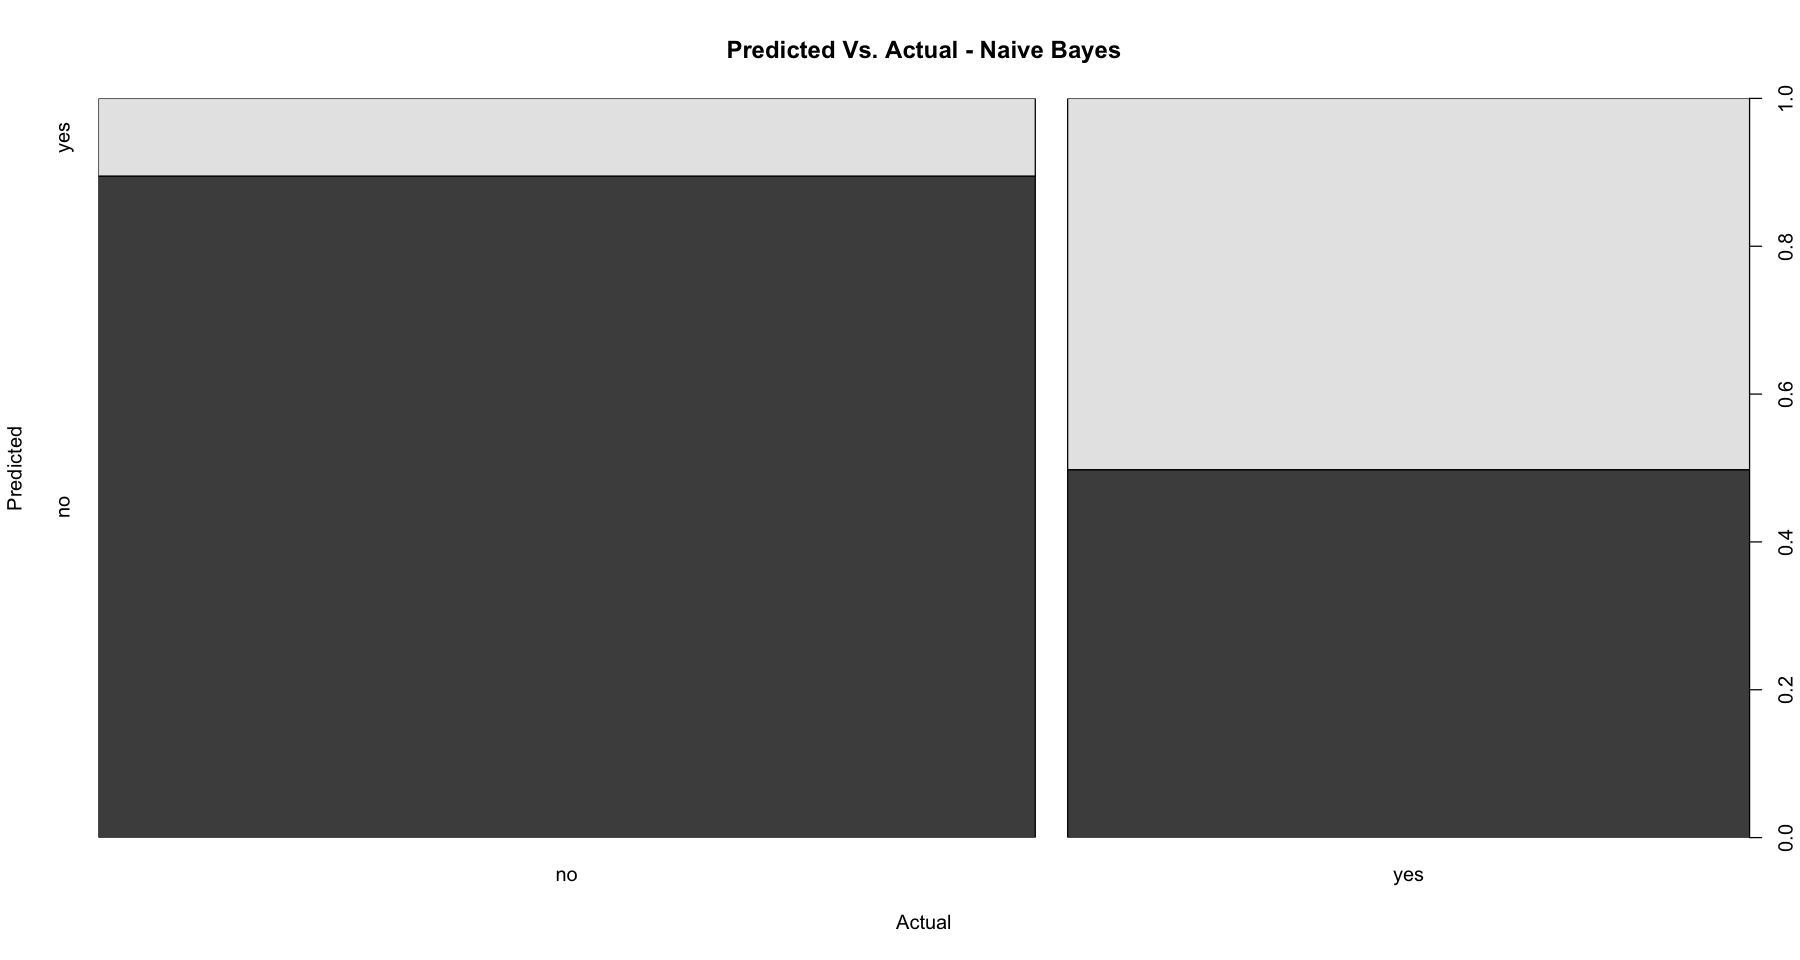

In [53]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot(pred.nb, testdf$churn_number, main="Predicted Vs. Actual - Naive Bayes", ylab="Predicted",xlab="Actual")

## Part4. Conclusion

#### - What makes the problem interesting from the viewpoint of analytics?

By using Naive Bayes, we can predict customer churn. We can use the model in many different secenario and predict the outcome that can help use propose a better business solution.
For me, I think naive bayes is really convenient and easy to use. Below are my observations of the model that I think is quite interesting!

- For problems with a small amount of training data, it can achieve better results than other classifiers because it has a low propensity to overfit. 
- Training is quick, and consists of computing the priors and the likelihoods.
- Prediction on a new data point is quick. First calculate the posterior for each class. Then apply the MAP decision rule: the label is the class with the maximum posterior.


#### - How did the chosen technique help to illuminate the, or solve the problem?

Naive Bayes models are very popular in machine learning. It can help us solve a lot of problems. Below are some examples that it can help us solve the problems.

- Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.
- Multi class Prediction: This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.
- Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)
- Recommendation System: Naive Bayes Classifier and Collaborative Filtering  together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not


#### - What analysis do you think should be conducted next?

For customer churn prediction, the next analysis should be customer analysis. The company should focus on the customers who show non churn and find out the reason. Therefore, company can find out a better approach to retain the customers. The company should also focus on customers who show satisfaction. Company can propose some rewards for them to make sure that customers keep high satisfaction.

### - Overall Summary

From the above analysis, we can get the result below.

#### - Naive Bayes

    Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1082  127
       yes  438  442
                                          
Accuracy: 0.729535662996649       

From the model, we got the 72.95% accuracy rate.